In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import os

%matplotlib inline
plt.style.use('ggplot')
mlp.rcParams['figure.figsize'] = [8.0, 8.0]

In [3]:
base_dir = "../../../../Outcome Measurement Data/MALARIA/Distribucion de MTILD/"

In [4]:
entregas = None
entregasDetalles = None
for year in [2015, 2016, 2017, 2018]:
    for (dirpath, dirnames, filenames) in os.walk(base_dir + "BD " + str(year) + "/"):
        for filename in filenames:
            if "EntregaPIIs." in filename:
                if (filename.endswith(".csv")):
                    temp = pd.read_csv(dirpath + "/" + filename)
                elif (filename.endswith(".xlsx")):
                    temp = pd.read_excel(dirpath + "/" + filename, 0)
                temp["bd_year"] = year
                if entregas is None:
                    entregas = temp
                else:
                    entregas = pd.concat([entregas, temp]) 
            elif "EntregaPIIsDetalle." in filename:
                if (filename.endswith(".csv")):
                    temp = pd.read_csv(dirpath + "/" + filename)
                elif (filename.endswith(".xlsx")):
                    temp = pd.read_excel(dirpath + "/" + filename, 0)
                temp["bd_year"] = year
                if entregasDetalles is None:
                    entregasDetalles = temp
                else:
                    entregasDetalles = pd.concat([entregasDetalles, temp]) 

In [5]:
entregas["year"] = pd.to_numeric(entregas.FechaEnt.astype(str)\
            .map(lambda x: (x[0:4] if x.startswith("201") else x[-4:])), errors= "coerce")
entregas["month"] = pd.to_numeric(entregas.FechaEnt.astype(str)\
            .map(lambda x: (x[5:7] if x.startswith("201") else x[-7:-5])), errors= "coerce")

In [26]:
#entregasDetalles.Sustit.value_counts()
entregasDetalles["Sustit_"] = entregasDetalles.Sustit.map(lambda x: str(x).lower()[0] != "f")
entregasDetalles.Sustit_.value_counts()

False    1054519
True      475590
Name: Sustit_, dtype: int64

In [29]:
#entregas.columns
entregasDetalles.head()

,Apellido,Apellido_2,Camas,Campo1,Casa,Cedula,CodBoleta,CodComun,CodDepto,CodEnt,...,Personas,Sector,Sustit,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,bd_year,Sustit_
0,NaN,NaN,0.0,NaN,0,NaN,1,920126.0,9.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,NaN,2015,False
1,NaN,NaN,3.0,NaN,1,NaN,1,920126.0,9.0,1.0,...,5.0,0.0,False,1.0,1.0,1.0,1.0,NaN,2015,False
2,NaN,NaN,4.0,NaN,4,NaN,1,920126.0,9.0,2.0,...,6.0,0.0,False,2.0,2.0,2.0,2.0,NaN,2015,False
3,NaN,NaN,3.0,NaN,5,NaN,1,920126.0,9.0,3.0,...,5.0,0.0,False,3.0,3.0,3.0,3.0,NaN,2015,False
4,NaN,NaN,5.0,NaN,6,NaN,1,920126.0,9.0,4.0,...,6.0,0.0,False,4.0,4.0,4.0,4.0,NaN,2015,False


In [8]:
entregas["uid"] = entregas.CodComun.astype(str) +entregas.CodBoleta.astype(str) +\
                    entregas.FechaEnt.astype(str)

In [36]:
entregas_dedup = entregas.drop_duplicates(["CodComun", "CodBoleta", "CodEnt"], keep = 'first')

In [10]:
entregas_sub = entregas[((entregas.bd_year==2015) & (entregas.year <= 2015)) | 
                 ((entregas.bd_year==2016) & (entregas.year == 2016)) |
                 ((entregas.bd_year==2017) & (entregas.year == 2017)) |
                 ((entregas.bd_year==2018) & (entregas.year == 2018))]
entregas_sub = entregas_sub.drop_duplicates("uid", keep = 'first')

In [11]:
(entregas_sub.bd_year).value_counts().sort_index(), \
(entregas_dedup.bd_year).value_counts().sort_index()

(2015    36587
 2016    12173
 2017     2851
 2018     4573
 Name: bd_year, dtype: int64, 2015    37153
 2016    18861
 2017    11798
 2018     4631
 Name: bd_year, dtype: int64)

In [12]:
(entregas_sub.year).value_counts().sort_index(), \
(entregas_dedup.year).value_counts().sort_index()

(2012.0    12001
 2013.0     4519
 2014.0     2226
 2015.0    17841
 2016.0    12173
 2017.0     2851
 2018.0     4573
 Name: year, dtype: int64, 2012.0    19856
 2013.0     6210
 2014.0     3314
 2015.0    21901
 2016.0    13659
 2017.0     2852
 2018.0     4573
 Name: year, dtype: int64)

In [37]:
eMerge = pd.merge(entregas_dedup[["CodDepto", "CodComun", "CodBoleta", "bd_year", "FechaEnt", "year", "month"]], 
                  entregasDetalles[["CodDepto", "CodComun", "CodBoleta", "CodEnt", "bd_year", 
                                    "Personas", "MEmbarazada", "Menores5a", "Camas", "Pabellones", "Sustit_"]], 
                  how="inner", 
                  on=["CodComun", "CodBoleta", "bd_year"], suffixes=("_e", "_eD"))

In [39]:
eMerge.shape

(559473, 15)

In [33]:
entregasDetalles.shape

(1530109, 31)

In [16]:
entregas[entregas.CodComun.astype(str).map(lambda x: x[0]) != 
            entregas.CodDepto.astype(str).map(lambda x: x[0])]

,Apellido,Apellido_2,AñoProy,Camas,Categoria,Categoría,Cedula,CodBoleta,CodComun,CodDepto,...,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,bd_year,lp,nomlp,year,month,uid
1360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12.0,...,1360.0,1360.0,NaN,NaN,2015,NaN,NaN,NaN,NaN,0.00nan
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12.0,...,1.0,1.0,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.00nan
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12.0,...,1754.0,1754.0,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.00nan
3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12.0,...,3186.0,3186.0,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.00nan
3504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,12.0,...,3504.0,3504.0,NaN,NaN,2016,NaN,NaN,NaN,NaN,0.00nan


In [40]:
eMerge = eMerge[eMerge.year.isna() == False]

In [43]:
eMerge.groupby(["CodDepto_e", (eMerge.year)]).\
    Pabellones.sum().unstack(1).fillna(0)

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,2500.0,346.0,0.0,0.0
5.0,63189.0,12661.0,25526.0,75481.0,41708.0,20000.0,17309.0
6.0,0.0,0.0,6243.0,8393.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,6070.0,1936.0,422.0,0.0
9.0,0.0,0.0,0.0,19881.0,17263.0,446.0,4090.0
10.0,63795.0,47455.0,0.0,56722.0,69967.0,59.0,0.0
11.0,29615.0,28312.0,0.0,45595.0,37450.0,0.0,27937.0
12.0,19487.0,20463.0,50.0,25054.0,20518.0,0.0,0.0


In [19]:
deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")
deptos = deptos[lambda x: x.CODIGO.astype(int) <= 2200]

In [ ]:
mlp.rcParams['figure.figsize'] = [10.0, 10.0]
mlp.rcParams['axes.titlesize'] = 20
temp = deptos.merge(eMerge.groupby("CodDepto_e").Pabellones.sum().divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != 1 else "101")), 
                 left_on="CODIGO", right_on = "deptocode", how="outer" ).fillna(0)
ax = temp[temp.Pabellones == 0].plot(color="grey")
temp[temp.Pabellones > 0].plot("Pabellones", ax = ax, cmap = "Blues", legend=True, edgecolor="black")
ax.axis('off')
ax.set_title("Pabellones entregados entre 2012 y 2017 \n(en miles)")
    


In [47]:
pblYears = eMerge[eMerge.Sustit_==False].groupby(["CodDepto_e", "year"]).Pabellones.sum().divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != 1 else "101"))

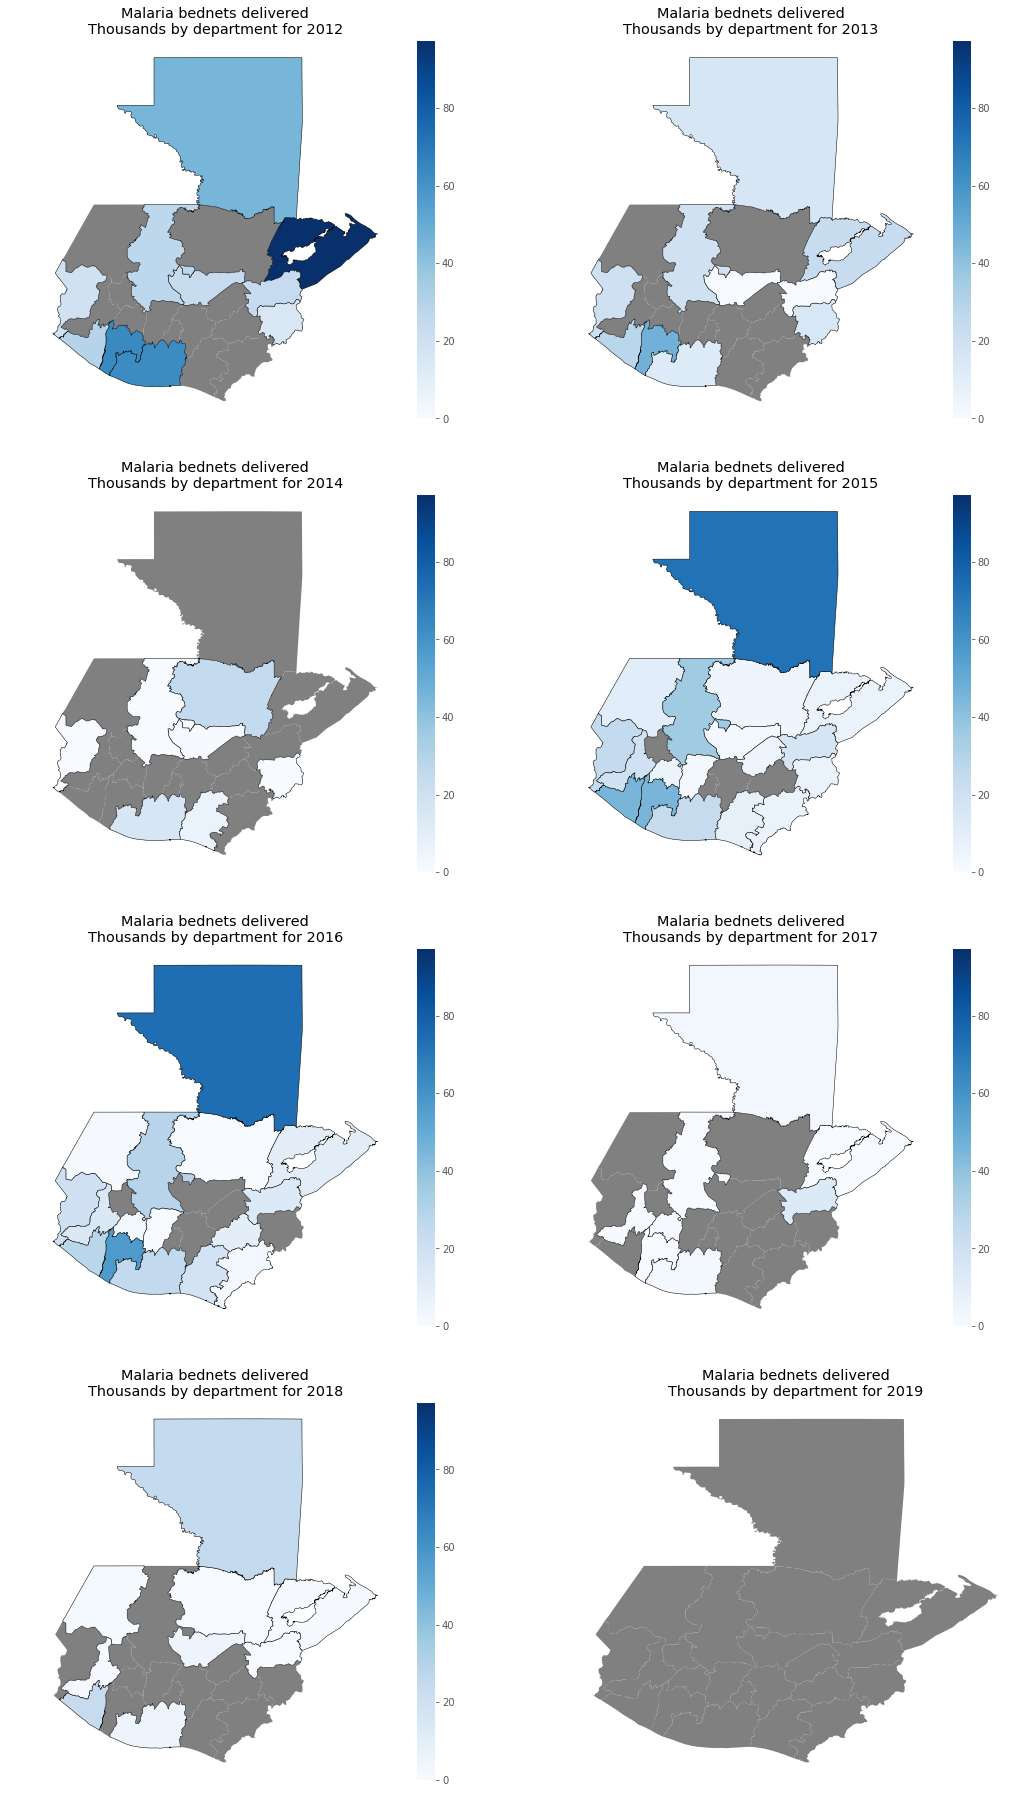

In [48]:
vmax = pblYears.Pabellones.max()

side = 8
n = 7
vmin = 0
#vmax = 8
f, axes = plt.subplots(int(np.ceil(n/2)), 2, figsize=(side*2*1.1, side*np.ceil(n/2) ))
i = 2012
for row in axes:
    for ax in row:
        temp3 = deptos.merge(pblYears[pblYears.year == i], 
                             left_on="CODIGO", right_on = "deptocode", how="left" ).fillna(0)
        temp3[temp3.Pabellones == 0].plot(ax=ax, color="grey")
        if len(temp3[temp3.Pabellones > 0])>0:
            temp3[temp3.Pabellones > 0].plot("Pabellones", ax = ax, cmap = "Blues", 
                                             legend=True, edgecolor="black",
                                             vmin = vmin, vmax = vmax)
        ax.axis('off')
        ax.set_title("Malaria bednets delivered\nThousands by department for "+ str(i))
        i += 1

In [49]:
eMerge.to_csv("../../../../Outcome Measurement Data/MALARIA/GTM - Bednets Distr.csv")

In [67]:
eMerge[(eMerge.year==2016) & (eMerge.CodDepto_e == 5)].Pabellones.sum()

41708.0

In [57]:
pblYears[pblYears.year==2018]

,CodDepto_e,year,Pabellones,deptocode
